## Coletor de Keywords de Links Pertinentes

In [1]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

train = 'train_news_positive_results.txt'
saved_kw = 'kw_learn_positive_results.txt'
kw_list_train = 'kw_list_train_positive.txt'

In [2]:
# BACKUP DAS KW - Cria uma variável com as leituras do arquivo, para caso este seja sobrescrito.
fileHandle= open(saved_kw, 'r')
mem = fileHandle.readlines()
fileHandle.close()

In [3]:
kw_list = [] # cria uma lista em branco

fileHandle = open(train,'r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
#url_news = set(url_news) # remove links duplicados
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [4]:
def get_kw(url):
    article = Article(url, fetch_images=False, language='pt', request_timeout=200) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    print(article.title)
    print(article.publish_date)
    print(article.keywords)
    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    time.sleep(5)
    
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[a,b,c],[d,e,f],[a,e,f]] --> [a,a,b,c,d,e,e,f,f]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            #print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de 
                                                            #frequência de aparecimento nas noticias

In [5]:
print("Getting Keywords from {} articles".format(len(url_news)))
for url in url_news: # para cada url no arquivo lido
    print("URL {}".format(url_news.index(url)))
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    try:
        get_kw(url) # chama a função para extrair kw de cada url
        print("done with: ",url)
        print("\n")
    except:
        print("Uh oh! We got an error. NEXT!")
print("done!")

Getting Keywords from 112 articles
URL 0
Homem mata esposa e amante a tiros e comete suicídio em Boa Vista
2019-02-14 00:00:00
['luciene', 'amante', 'pm', 'efetuados', 'homem', 'tiros', 'vista', 'comete', 'vinicius', 'chegou', 'seguida', 'mata', 'esposa', 'albério', 'polícia', 'carro', 'suicídio']
done with:  https://g1.globo.com/rr/roraima/noticia/2019/02/14/homem-mata-esposa-e-amante-a-tiros-e-comete-suicidio-em-boa-vista.ghtml


URL 1
Áudios apontam que jovem estava preso antes de suposta troca de tiros com PMs, em Aragarças
2019-02-15 00:00:00
['preso', 'áudios', 'aragarças', 'família', 'tiros', 'jovem', 'suposta', 'pms', 'jeferson', 'troca', 'morreu', 'menino', 'polícia', 'apontam', 'carro']
done with:  https://g1.globo.com/go/goias/noticia/2019/02/15/audios-apontam-que-jovem-estava-preso-antes-de-suposta-troca-de-tiros-com-pms-em-aragarcas.ghtml


URL 2
Miss ES tem arma apontada para a cabeça ao ter o carro roubado
2019-02-15 00:00:00
['cabeça', 'municipal', 'miss', 'guarda', 'su

Criança é atingida por disparo de arma de fogo em Itatim
2019-01-30 00:00:00
['policiais', 'equipe', 'disparo', 'vítima', 'atingida', 'ferimento', 'criança', 'hospital', 'informar', 'itatim', 'rua', 'arma', 'fogo']
done with:  http://midiabahia.com.br/cidades/2019/01/30/crianca-e-atingida-por-disparo-de-arma-de-fogo-em-itatim/


URL 21
Aeronáutica tenta identificar se helicóptero da PM foi atingido por disparo
None
['pm', 'semana', 'helicóptero', 'disparo', 'tvaeronáutica', 'visualizações', 'tenta', 'identificar', 'tentam', 'sido', 'atingido', 'aeronáutica']
done with:  https://videos.band.uol.com.br/16601575/aeronautica-tenta-identificar-se-helicoptero-da-pm-foi-atingido-por-disparo.html


URL 22
Criança é baleada em CG e polícia investiga se disparo foi acidental
None
['sábadoredaçãoleia', 'campina', 'passava', 'trauma', 'investiga', 'disparo', 'cg', 'mãe', 'baleada', 'atingida', 'whatsapp', 'juristas', 'criança', 'menino', 'polícia', 'acidental']
done with:  https://www2.pbagora.com

Menino de 10 anos morre após suposto disparo acidental de arma caseira em Paragominas
2019-01-02 00:00:00
['polícia', 'sudeste', 'sido', 'madrugada', 'disparo', 'vítima', 'paragominas', 'morre', 'terçafeira', 'namorado', 'acidental', 'morreu', 'menino', 'caseira', '10', 'tiro', 'suposto', 'arma']
done with:  https://g1.globo.com/pa/para/noticia/2019/01/02/menino-de-10-anos-morre-apos-suposto-disparo-acidental-de-arma-caseira-em-paragominas.ghtml


URL 43
Após atingir amigo com disparo acidental, PM comete suicídio na Vila Itatiaia, em Goiânia
2018-10-24 22:04:07-03:00
['oliveira', 'amigo', 'comete', 'vila', 'soldado', 'polícia', 'acidental', 'disparo', 'goiânia', 'arma', 'pm', 'itatiaia', 'resistiu', 'militar', 'policial', 'faria', 'flávio', 'atingir', 'suicídio']
done with:  https://www.emaisgoias.com.br/soldado-da-pm-e-amigo-morrem-apos-disparo-acidental-de-arma-de-fogo-na-vila-itatiaia-em-goiania/


URL 44
Morre jovem que fez disparo em academia de tiros na Asa Sul
None
['academia',

Dupla armada faz disparo em supermercado e leva mais de R$ 2 mil no bairro Prainha
2018-11-30 00:00:00
['minutos', 'feito', 'proprietários', 'supermercado', 'disparo', '2', 'filho', 'prainha', 'armada', 'quintafeira', 'dupla', 'leva', 'prainhaação', 'bairro', 'r']
done with:  https://g1.globo.com/pa/santarem-regiao/noticia/2018/11/30/dupla-armada-faz-disparo-em-supermercado-e-leva-mais-de-r-2-mil-no-bairro-prainha.ghtml


URL 63
Dupla armada faz disparo em supermercado e leva mais de R$ 2 mil no bairro Prainha
2018-11-30 00:00:00
['minutos', 'feito', 'proprietários', 'supermercado', 'disparo', '2', 'filho', 'prainha', 'armada', 'quintafeira', 'dupla', 'leva', 'prainhaação', 'bairro', 'r']
done with:  https://g1.globo.com/pa/santarem-regiao/noticia/2018/11/30/dupla-armada-faz-disparo-em-supermercado-e-leva-mais-de-r-2-mil-no-bairro-prainha.ghtml


URL 65
Em nota, Colégio Adventista promete auxílio psicológico após disparo de arma de fogo
2018-10-17 20:31:17-04:00
['arma', 'sala', 'ocorr

Flanelinha é morto a tiros nas proximidades do Teatro Amazonas
2019-02-16 00:00:00
['teatro', 'amazonas', 'morto', 'êxito', 'centro', 'tiros', 'vítima', 'urgência', 'manaus', 'flanelinha', 'volta', 'proximidades', 'polícia', 'rua']
done with:  https://g1.globo.com/am/amazonas/noticia/2019/02/16/flanelinha-e-morto-a-tiros-nas-proximidades-do-teatro-amazonas.ghtml


URL 84
Homem é encontrado morto a tiros em São Leopoldo
2019-02-16 14:39:35+00:00
['leopoldo', 'vale', 'morto', 'homem', 'tiros', 'encontrado', 'vítima', 'identificada', 'sinos', 'polícia']
done with:  https://gauchazh.clicrbs.com.br/seguranca/noticia/2019/02/homem-e-encontrado-morto-a-tiros-em-sao-leopoldo-cjs7l43ky04de01liopmf6n3c.html


URL 85
Homem é morto a tiros na Marambaia, em Belém
2019-02-14 00:00:00
['preliminares', 'morto', 'homem', 'tiros', 'suspeitos', 'informações', 'vítima', 'belém', 'marambaia', 'frente', 'surpreendida', 'oficina', 'polícia', 'carro', 'prata']
done with:  https://g1.globo.com/pa/para/noticia/

Mulher ouve barulho de tiro e encontra irmão morto em fazenda de Palmas
2019-02-18 00:00:00
['morto', 'ouve', 'polícia', 'barulho', 'vítimaamaral', 'civil', 'encontra', 'militar', 'encontrou', 'corpo', 'mulher', 'fazenda', 'palmas', 'irmã', 'irmão', 'tiro', 'carro']
done with:  https://g1.globo.com/to/tocantins/noticia/2019/02/18/mulher-ouve-barulho-de-tiro-e-encontra-irmao-morto-em-fazenda-de-palmas.ghtml


URL 106
Adolescente é morto a tiro em distribuidora do Recanto das Emas
2019-02-09 00:00:00
['morto', 'adolescente', 'recanto', 'emas', 'distribuidora', 'informações', 'vítima', 'volta', 'quadra', 'polícia', 'hospital', 'tiro', 'região', 'aconteceu']
done with:  https://www.correiobraziliense.com.br/app/noticia/cidades/2019/02/09/interna_cidadesdf,736510/adolescente-e-morto-a-tiro-em-distribuidora-do-recanto-das-emas.shtml


URL 107
Adolescente é morta com tiro no rosto um mês após comemorar 15 anos
2019-02-08 00:00:00
['rosto', 'adolescente', 'morta', '15', 'pai', 'casa', 'comemor

In [6]:
kw_learn = kw_clear();

In [7]:
## Salva as KW para análise posterior
with open(saved_kw, 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

In [8]:
with open(kw_list_train, 'w') as f:
    for item in kw_list:
        f.write("%s\n" % item)
    f.close()

## Após os dados coletados
Análise das Keywords

In [9]:
## Abre as KW
fileHandle = open(saved_kw, 'r')
kw_list = fileHandle.readlines()
fileHandle.close()

kw_list = [word.strip() for word in kw_list] # remove o \n das palavras

In [10]:
import collections
a = kw_list
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('disparo', 58), ('polícia', 56), ('arma', 45), ('vítima', 33), ('homem', 32), ('tiro', 31), ('tiros', 29), ('fogo', 24), ('morto', 23), ('jovem', 19), ('pm', 18), ('militar', 16), ('volta', 16), ('acidental', 16), ('rua', 14), ('atingido', 12), ('morre', 11), ('atingida', 11), ('mulher', 11), ('preso', 10), ('zona', 10), ('casa', 10), ('suspeito', 9), ('policial', 9), ('carro', 8), ('cabeça', 8), ('criança', 8), ('policiais', 8), ('suspeitos', 7), ('revólver', 7), ('disparos', 7), ('hospital', 7), ('pai', 7), ('menino', 6), ('veículo', 6), ('tentativa', 6), ('espingarda', 6), ('silva', 6), ('sido', 6), ('disse', 6), ('vila', 5), ('sul', 5), ('segundafeira', 5), ('bairro', 5), ('região', 5), ('moradores', 5), ('mãe', 5), ('rapaz', 5), ('morta', 5), ('sábado', 5)]


In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Visualização dos dados

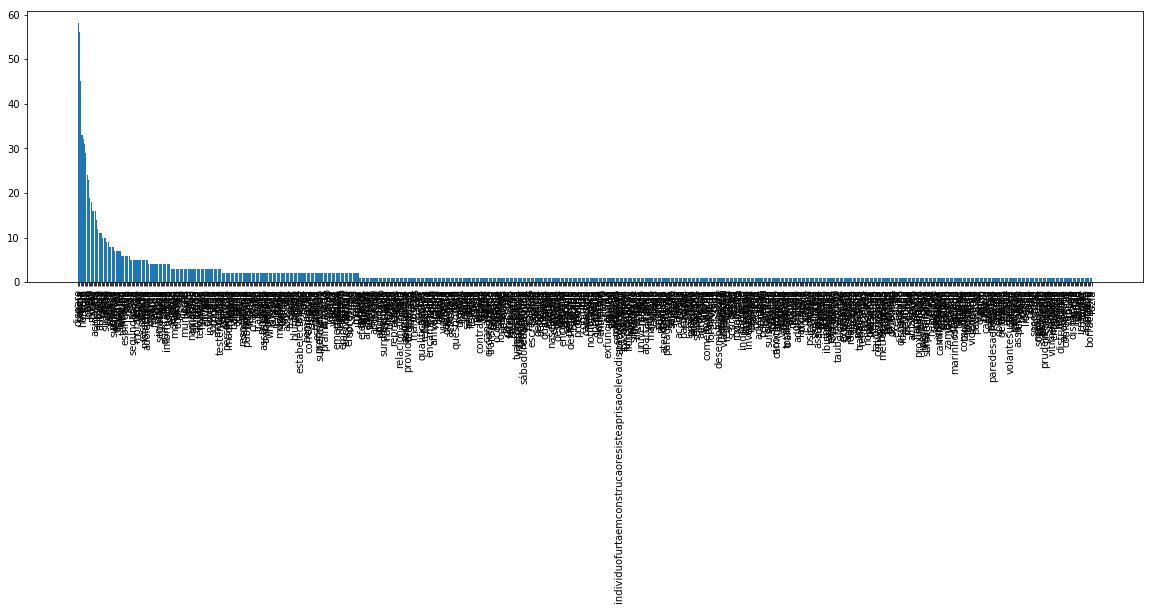

In [12]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [13]:
## Separa o dict gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

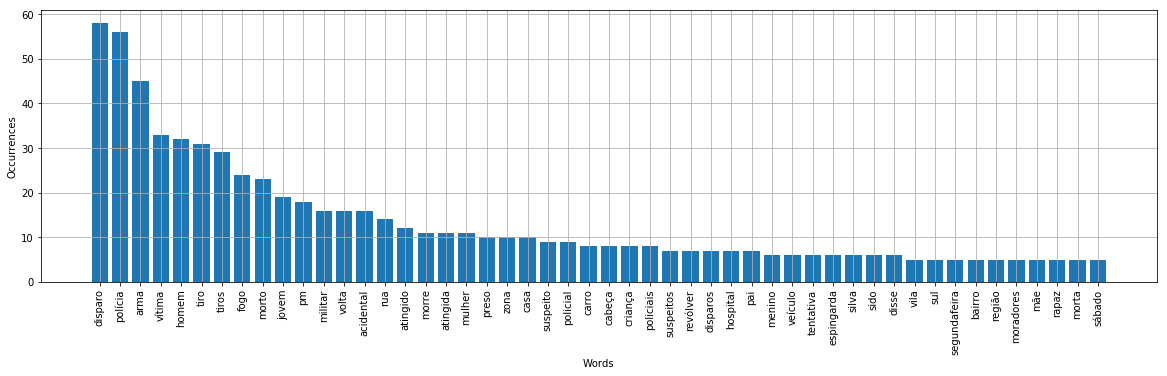

In [14]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()